In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os
from pathlib import Path
import numpy as np

In [40]:
path = Path(input("请输入路径："))

In [41]:
os.chdir(path)
print(f"当前路径为:{os.getcwd()}")

当前路径为:/Users/wangshuaibo/Documents/北京悦动/脑卒中项目/阿帅笔记/测试数据及分析结果/20230421医院鞋垫数据检验


In [47]:
for file in os.listdir():
    if ".csv" in file:
        print(file)


hwshuai_丁冠宏-走40步路-鞋垫4-1-604F-V4.16-014_202304211216193530.csv
hwshuai_丁冠宏-走40步路-鞋垫4-1-604F-V4.16-013_202304211209071330.csv


In [48]:
file = "hwshuai_丁冠宏-走40步路-鞋垫4-1-604F-V4.16-014_202304211216193530.csv"

In [235]:
# 走40步路
file = "/Users/wangshuaibo/Documents/北京悦动/脑卒中项目/阿帅笔记/测试数据及分析结果/20230420鞋垫测试/hwshuai_丁冠宏-走6步路-鞋垫2-1-41AB-V4.16-006_202304201530532020.csv"

In [253]:
# 跑步机走 10 分钟
file = "/Users/wangshuaibo/Documents/北京悦动/脑卒中项目/阿帅笔记/测试数据及分析结果/20230421跑步机走路测试/Done/hwshuai_丁冠宏-跑步机走路10分钟-鞋垫2-1-41AB-V4.01-002_202304211610535380.csv"

In [254]:
df = pd.read_csv(file)
L_data = df[df["part"]=="L"]
R_data = df[df["part"]=="R"]
R_data.columns

Index(['part', 'timestamp', 'gx', 'gy', 'gz', 'ax', 'ay', 'az', 'qw', 'qx',
       'qy', 'qz', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10',
       'p11', 'p12', 'p1-c', 'p2-c', 'p3-c', 'p4-c', 'p5-c', 'p6-c', 'p7-c',
       'p8-c', 'p9-c', 'p10-c', 'p11-c', 'p12-c'],
      dtype='object')

In [266]:

sensors = ['p1-c', 'p2-c', 'p3-c', 'p4-c', 'p5-c', 'p6-c', 'p7-c',
       'p8-c', 'p9-c', 'p10-c', 'p11-c', 'p12-c']

L_calibre = pd.DataFrame({})

for sensor_name in sensors:
    sensor = L_data[sensor_name]

    # 查找峰值
    # 以快跑 16km/h ，对应至少间隔 22 个数
    peaks,_ = find_peaks(-sensor,-sensor.max(),width=20)
    L_shape = sensor.shape
    peakls = peaks.tolist()

    # 查找峰值并绘制图片
    #sensor.plot()
    #plt.plot(peaks*2,sensor.iloc[peakls])

    # 使用峰值校准数据
    # 所有数据减去前一个峰值
    # 第一个峰值之前的数据减去第一个峰值
    range_start = peakls[0]
    df_calibre = pd.DataFrame({})
    # 选取区间内数值
    snip_data= sensor.iloc[0:range_start]
    # 进行校准
    calibre_sensor_snip = snip_data.apply(lambda x: x-sensor.iloc[range_start])
    df_calibre = pd.concat([df_calibre.reset_index(drop=True), 
                                    calibre_sensor_snip.reset_index(drop=True)],axis=0)   
    for i in range(len(peakls)):

        # 选取两个波谷之间的区间
        range_start = peakls[i]
        if i < len(peakls)-1:
            range_end = peakls[i+1]
        else:
            range_end = L_shape[0]
        
        #此处缺少了 0-range_start 区间的判断

        # 选取区间内数值
        snip_data= sensor.iloc[range_start:range_end]
        # 进行校准
        calibre_sensor_snip = snip_data.apply(lambda x: x-sensor.iloc[range_start])
        
        '''
        #绘图显示
        sensor.plot()
        calibre_sensor_snip.plot()  
        '''

        # 将当前生成的 Series 与 df_calibre 拼接
        df_calibre = pd.concat([df_calibre.reset_index(drop=True), 
                                    calibre_sensor_snip.reset_index(drop=True)],axis=0)
        
        # 重置一下索引，使得索引是唯一的
        df_calibre.reset_index(drop=True, inplace=True)
        
    df_calibre.columns = [sensor_name]
    L_calibre = pd.concat([L_calibre.reset_index(drop=True),
                          df_calibre.reset_index(drop=True)],axis=1)

    # 绘图
    # sensor.plot()
    # df_calibre.plot()


In [267]:
# 索引重新采样
L_data_reindex = L_data.reset_index(drop=True).copy()
L_data_reindex

,part,timestamp,gx,gy,gz,ax,ay,az,qw,qx,...,p3-c,p4-c,p5-c,p6-c,p7-c,p8-c,p9-c,p10-c,p11-c,p12-c
0,L,8,0.001,-0.005,-0.001,0.052,0.071,-1.018,0.2928,-0.0191,...,2229.0,2358.0,1497.0,2305.0,3242.0,3601.0,3395.0,2374.0,2682.0,3914.0
1,L,16,0.006,0.002,0.001,0.034,0.063,-1.021,0.2928,-0.0191,...,2226.0,2358.0,1497.0,2305.0,3242.0,3601.0,3395.0,2372.0,2688.0,3922.0
2,L,24,0.004,0.006,-0.001,0.034,0.064,-1.021,0.2929,-0.0192,...,2226.0,2360.0,1495.0,2305.0,3237.0,3608.0,3393.0,2382.0,2688.0,3922.0
3,L,32,0.007,0.008,-0.001,0.038,0.066,-1.025,0.2929,-0.0193,...,2224.0,2358.0,1495.0,2305.0,3237.0,3608.0,3393.0,2382.0,2690.0,3939.0
4,L,40,0.006,0.004,-0.001,0.036,0.065,-1.021,0.2929,-0.0194,...,2224.0,2358.0,1500.0,2304.0,3252.0,3609.0,3403.0,2380.0,2688.0,3939.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31375,L,251008,-0.286,2.272,1.187,-1.441,0.795,-2.116,0.3582,-0.5382,...,2228.0,2268.0,1819.0,2806.0,3968.0,4257.0,4061.0,2895.0,3296.0,4984.0
31376,L,251016,0.234,-2.303,0.086,-1.212,0.148,-1.571,0.3613,-0.5210,...,2225.0,2269.0,1821.0,2799.0,3954.0,4257.0,4061.0,2895.0,3296.0,4984.0
31377,L,251024,1.305,-3.351,-0.491,-0.596,0.269,-0.722,0.3559,-0.4987,...,2225.0,2269.0,1821.0,2799.0,3954.0,4233.0,4055.0,2886.0,3281.0,4963.0
31378,L,251032,0.910,-2.991,-0.439,-0.439,0.413,-0.501,0.3529,-0.4772,...,2233.0,2264.0,1826.0,2796.0,3932.0,4234.0,4056.0,2886.0,3281.0,4963.0


<AxesSubplot:>

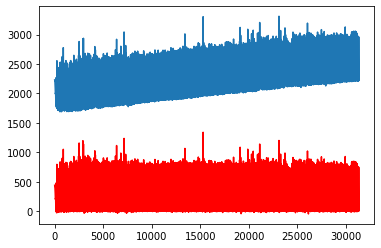

In [268]:
L_data_reindex[sensors[2]].plot()
L_calibre[sensors[2]].plot(c="r")